# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

No contexto das instituições financeiras, uma importante ferramenta de análise está na capacidade de traçar o perfil de um novo cliente. Dentre os diversos fatores a serem analisados, destaca-se a possibilidade de prevermos a renda desse cliente com base em suas características (dados de cadastro).

Portanto, o presente projeto trata-se de uma análise completa de crédito em uma base simulada. Com isso, busca-se prever a renda de um cliente com base em características como idade, escolaridade, ocupação, etc.

Aqui, simulam-se patamares de crédito, com base na literatura, para diferentes rendas previstas por um modelo.

Os clientes serão divididos em 3 classes segundo a sua renda: 'standard', 'gold' e 'platinum'.

Cálculo do Valor de Empréstimo: O valor total do empréstimo é estimado com base na renda prevista, seguindo a premissa de que as parcelas mensais não devem exceder 30% da renda mensal do cliente. Considerando um prazo de pagamento de 24 meses, o montante é calculado da seguinte forma:

VALOR DO EMPRÉSTIMO = 24 × (0.3 × Renda Prevista)

A implementação do modelo desenvolvido nesse projeto pode ser usado para segmentação de clientes, concessão de crédito, análise de mercado.

## Etapa 2 Crisp-DM: Entendimento dos dados
Primeiramente, iremos entender a nossa base de dados, ou seja, as variáveis contidas no arquivo, o que elas significam e o seu tipo.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data em meses                                      | object       |
| id_cliente              |  Identificador do cliente                           | int64        |
| sexo                    |  Sexo do cliente [F/M]                              | object       |
| posse_de_veiculo        |  Possui ou não possui veículo                       | bool         |
| posse_de_imovel         |  Possui ou não possui imóvel                        | bool         |
| qtd_filhos              |  Quantidade de filhos                               | int64        |
| tipo_renda              |  Tipo de renda/regime de trabalho                   | object       |
| educacao                |  Escolaridade                                       | object       |
| estado_civil            |  Estado civil                                       | object       |
| tipo_residencia         |  Tipo de residência                                 | object       |
| idade                   |  Idade                                              | int64        |
| tempo_emprego           |  Tempo de emprego                                   | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas em sua residência            | float64      |
| renda                   |  Renda.                                             | float64      |





#### Carregando os pacotes

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [227]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

#### Carregando os dados


In [6]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
print(renda.head(2))
print(renda.info())

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           0   Empresário         Secundário     Solteiro            Casa   
1           0  Assalariado  Superior completo       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    renda  
0     26       6.602740                    1.0  8060.34  
1     28       7.183562                    2.0  1852.15  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [7]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
prof.to_file('./output/renda_analise.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Comentário a respeito das univariadas

Em primeiro lugar, o método ProfileReport gerou 3 alertas: i) a variável tempo de emprego tem muitos missinigs, cerca de 17%; ii) a variável Unnamed: 0 contém valores únicos, o que faz sentido, pois trata-se de um identificador do Data Frame e iii) em quantidade de filhos há número grande de zeros, o que também é esperado.

Essa primeira análise é importante para o tratamento das variáveis para a posterior construção do modelo. Abaixo teremos os tipos das variáveis, também a serem avaliadas para a construção do modelo.


### Entendimento dos dados - Bivariadas





Com o objetivo de não poluir o notebook, a análise das variáveis categóricas será realizada no Streamlit do projeto.

Abaixo, segue a naálise das variáveis numéricas, a partir da correlação de Pearson (linear).

In [46]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          15000 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
renda.head(1)
renda["tempo_emprego"] = renda["tempo_emprego"].fillna(value=renda["tempo_emprego"].mean())

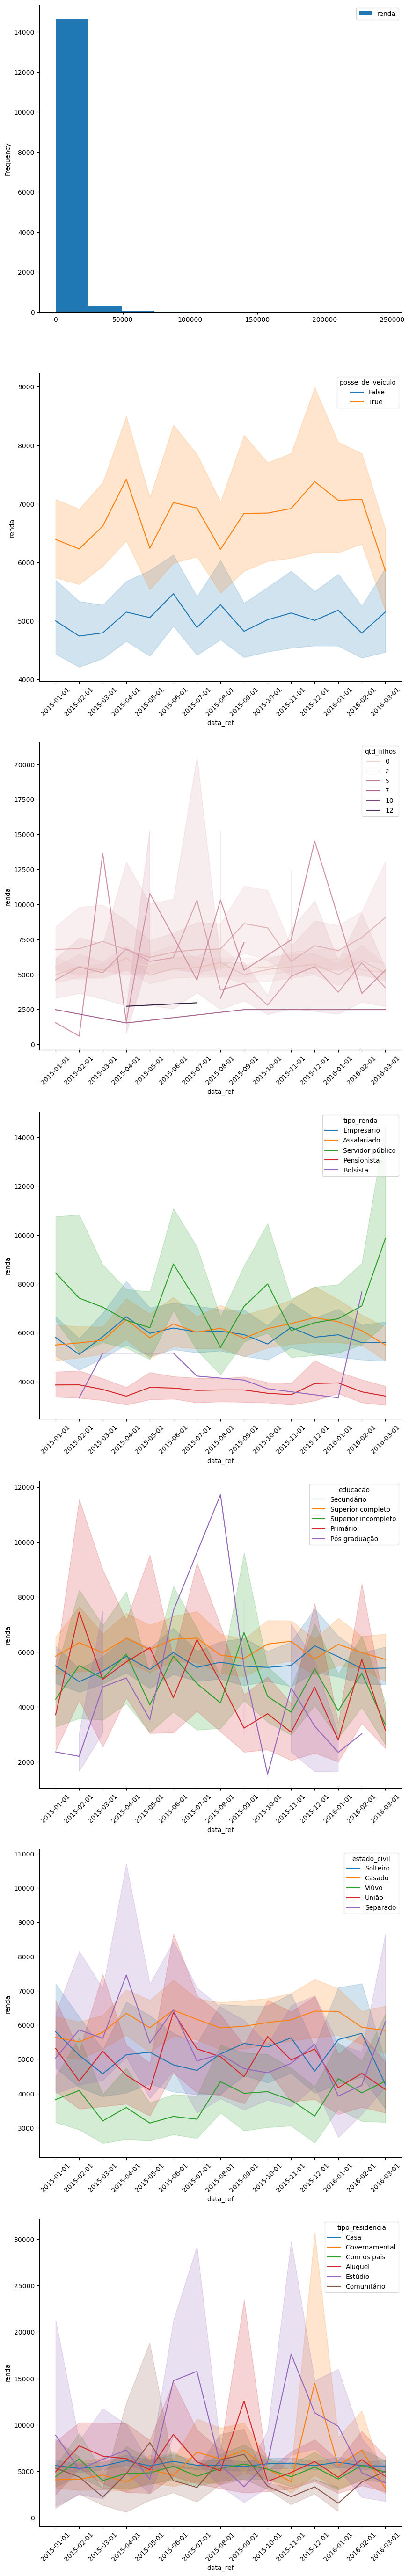

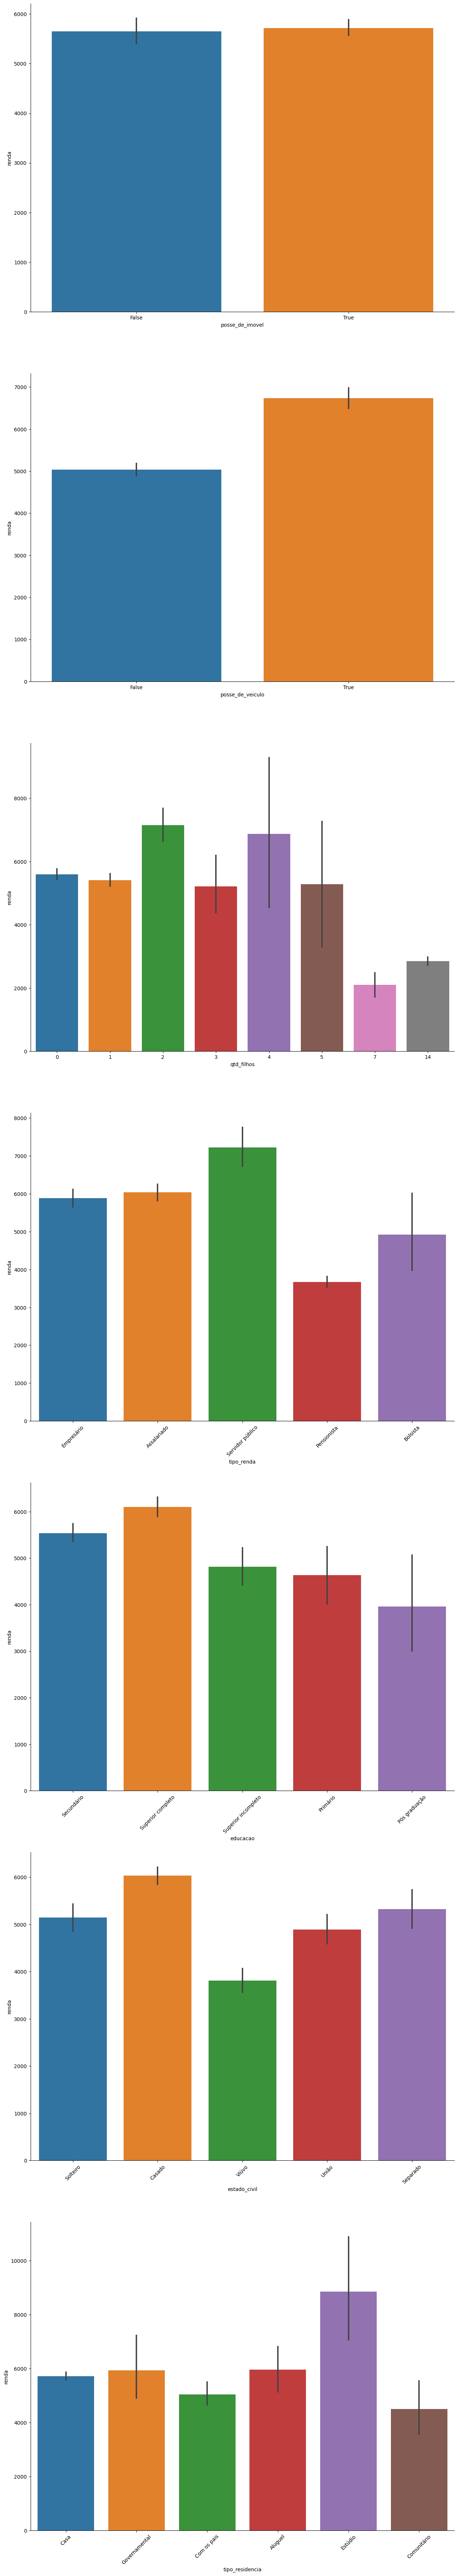

In [11]:
#plots
fig, ax = plt.subplots(7,1,figsize=(10,70))
renda[['posse_de_imovel','renda']].plot(kind='hist', ax=ax[0])
sns.lineplot(x='data_ref',y='renda', hue='posse_de_veiculo',data=renda, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='qtd_filhos',data=renda, ax=ax[2])
ax[2].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_renda',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='educacao',data=renda, ax=ax[4])
ax[4].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='estado_civil',data=renda, ax=ax[5])
ax[5].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_residencia',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45)

sns.despine()

fig, ax = plt.subplots(7,1,figsize=(15,90))
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0])
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, ax=ax[1])
sns.barplot(x='qtd_filhos',y='renda',data=renda, ax=ax[2])
sns.barplot(x='tipo_renda',y='renda',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45)
sns.barplot(x='educacao',y='renda',data=renda, ax=ax[4])
ax[4].tick_params(axis='x', rotation=45)
sns.barplot(x='estado_civil',y='renda',data=renda, ax=ax[5])
ax[5].tick_params(axis='x', rotation=45)
sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45)
sns.despine()


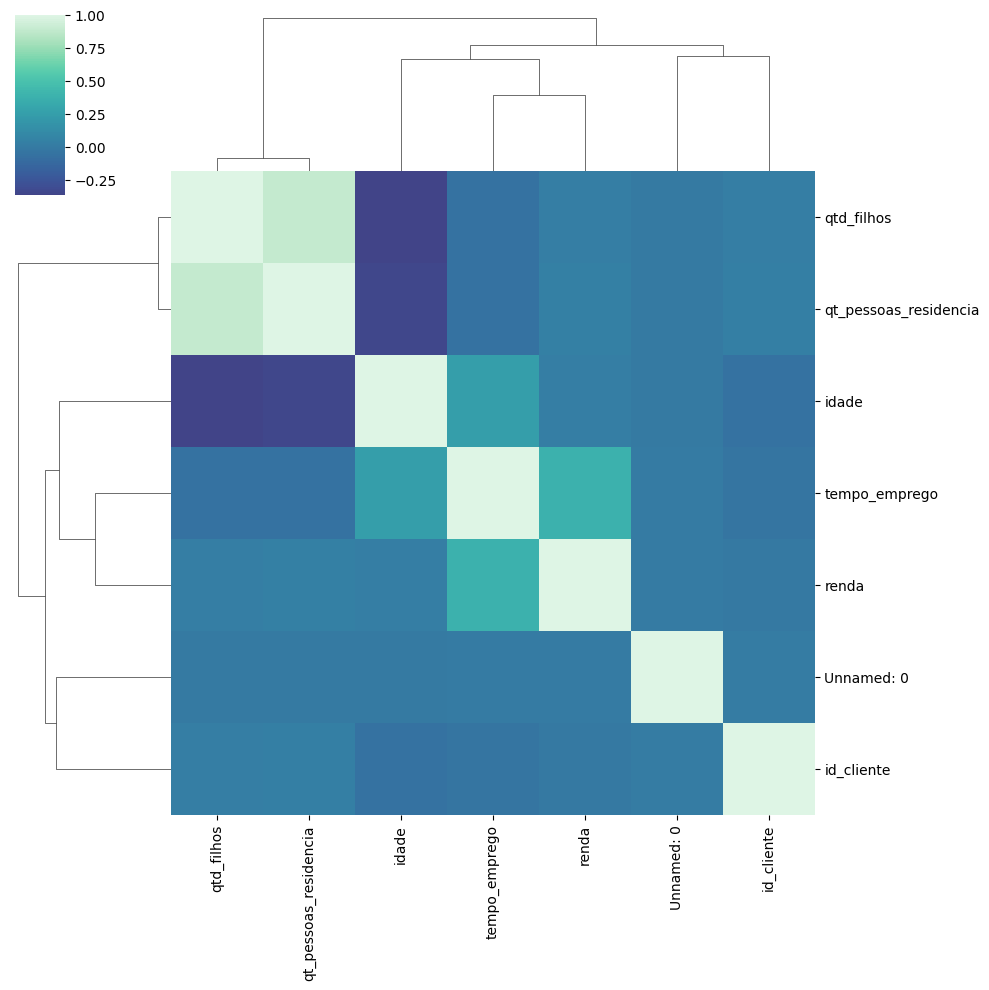

In [75]:
renda_numerica = renda.select_dtypes(include=['number'])
renda_corr = renda_numerica.corr()
sns.clustermap(renda_corr, figsize=(10, 10), center=0, cmap="mako")

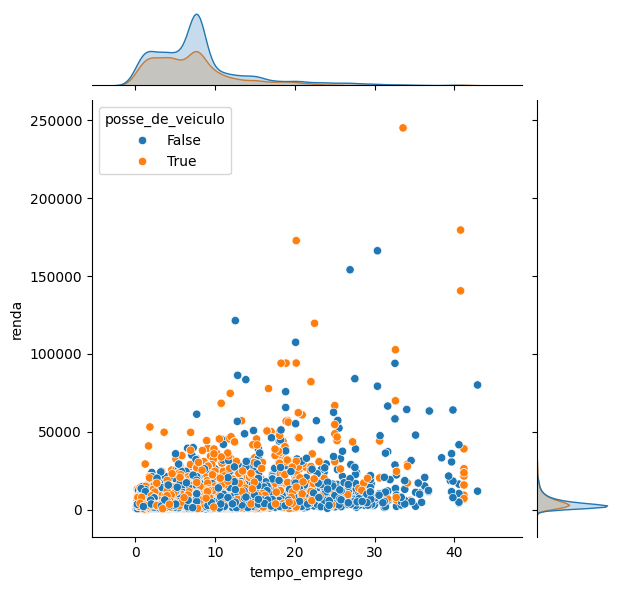

In [72]:
sns.jointplot(x='tempo_emprego',y='renda',data=renda, hue = "posse_de_veiculo")

## Comentário

A partir da matriz de correlação, vemos que a variável renda está formente ligada ao tempo de emprego - dentre as variáveis numéricas, pois são elas as medidas pela correlação de Pearson.

A análise das variáveis categóricas em função da renda está no Stremlit do projeto, com o objetivo de não poluir o notebook.

Lá, vemos que uma possível variável explicativa é a posse de veículo: clientes que possuem veículo possuem renda significativamente maior na base de dados. Por isso, o gráfico acima relaciona as 3 variáveis. Nele, podemos ver que de fato os indivíduos que possuem veículo encontram-se em uma média maior de renda em média.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Temos alguns problemas na base: as datas estão no formato de objeto, a variável tempo_emprego tem um alto número de dados faltantes.


In [50]:
# trabalhando os dados faltantes, o que ocorre em 17% dos valores de tempo_emprego
# nesse caso, melhor completar com a média para não perder tantas informações e não enviesar os dados

renda['tempo_emprego']= renda['tempo_emprego'].fillna(renda['tempo_emprego'].mean())

In [56]:
# datas em formato datetime

renda['data_ref'] = pd.to_datetime(renda['data_ref'])

In [57]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   id_cliente             15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          15000 non-null  float64       
 13  q

In [284]:
renda["target"] = pd.cut(
    renda["renda"],
    bins=[-np.inf, 3000, 5000, np.inf],
    labels=[0, 1, 2]
)

X = renda.drop(["renda","data_ref","id_cliente", "Unnamed: 0", "target", "sexo"], axis=1)
y = renda["target"] 


X_encoded = pd.get_dummies(X, drop_first=True)


X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posse_de_veiculo       15000 non-null  bool   
 1   posse_de_imovel        15000 non-null  bool   
 2   qtd_filhos             15000 non-null  int64  
 3   tipo_renda             15000 non-null  object 
 4   educacao               15000 non-null  object 
 5   estado_civil           15000 non-null  object 
 6   tipo_residencia        15000 non-null  object 
 7   idade                  15000 non-null  int64  
 8   tempo_emprego          12427 non-null  float64
 9   qt_pessoas_residencia  15000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(4)
memory usage: 966.9+ KB


In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=111)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Na primeira tentativa, usarei o método de Árvores de Decisão. 

A regressão tenta ajustar o problema em uma equação. Na análise descritiva, vemos que há rendas altas e baixas nas diferentes variáveis. Percebeu-se que o tempo de emprego e posse de veículo são fatores relevantes, entretanto, dada a amplitude de rendas presentes, não me parece produtivo usar um método que tente acertar a renda de um indivíduo com base em suas características.

A solução seria a seguinte: dadas as características de um cliente, ele terá sua renda predita e, com base nela, será calculado o crédito a ser cedido para o cliente com base em sua renda. Os patamares de renda escolhidos são arbitrários, tratando-se apenas de parâmetros para esse exercício.

### Rodando o modelo


In [353]:
#rodando uma primeira árvore
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=11)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=11)

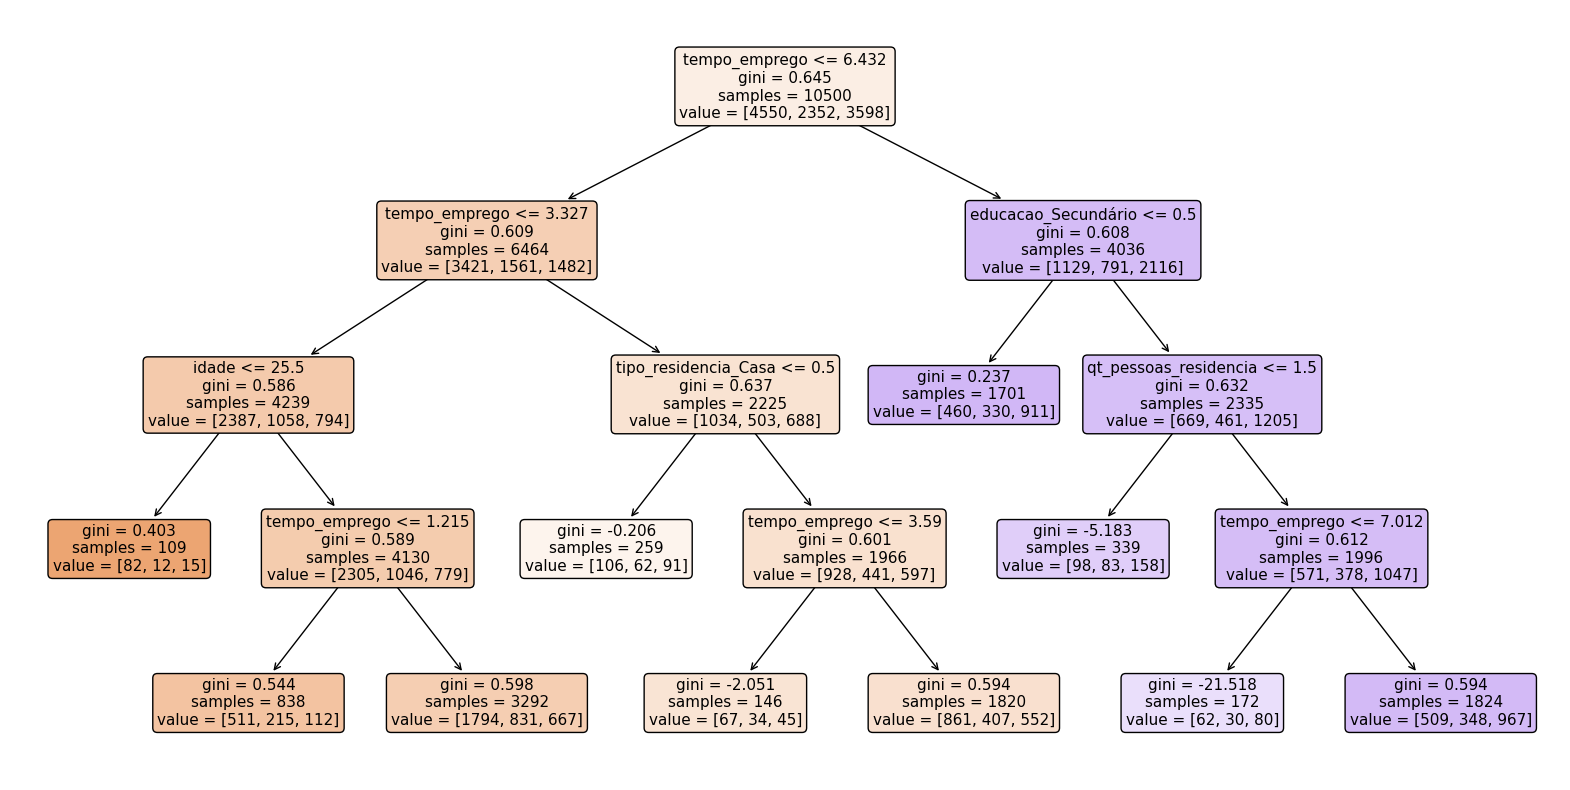

In [354]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    feature_names=X_encoded.columns.tolist(),  # Converta para lista
    rounded=True,
)
plt.show()

In [358]:
y_pred = model.predict(X_test)
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"R² no treino: {r2_train:.4f}")
print(f"R² no teste: {r2_test:.4f}")

R² no treino: 0.5273
R² no teste: 0.5062


In [360]:
mae = mean_absolute_error(y_test, y_pred)

mae

0.7566666666666667

In [362]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse

1.132450636647993

Text(0.5, 36.72222222222221, 'Número mínimo obs por folha \n\n O valor de R quadrado se encontra no interior de cada célula')

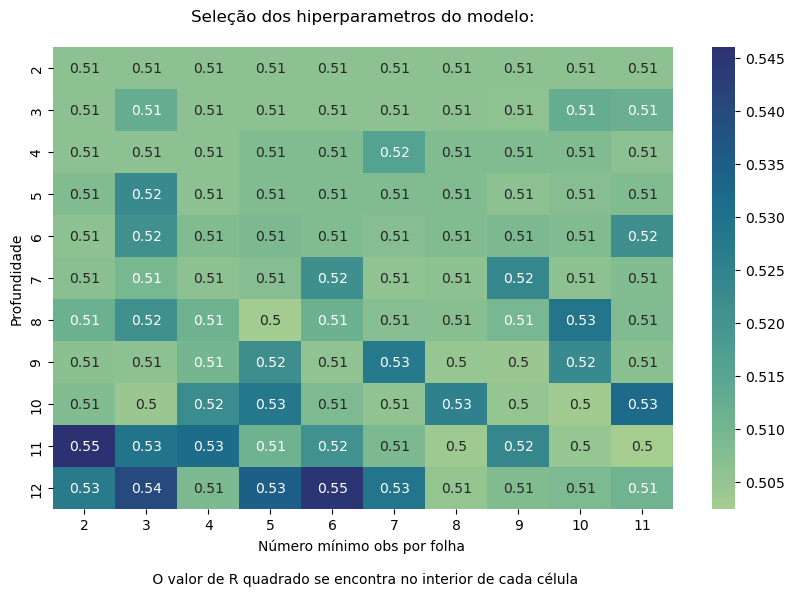

In [364]:
#teste para prever resultados melhores

rsqr = []
ind_i = []
ind_j = []

for i in range(2, 13):
    for j in range(2, 12):
        tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
        tree.fit(X_train, y_train)
        rsq = tree.score(X_test, y_test)
        rsqr.append(rsq)
        ind_i.append(i)
        ind_j.append(j)
        
df_rsqr = pd.DataFrame({'r_quadrado':rsqr, 
                        'Profundidade':ind_i, 
                        'n_minimo_obs_folhas':ind_j}
                       )

plt.figure(figsize=(10,6))
plt.title('Seleção dos hiperparametros do modelo:\n')
sns.heatmap(df_rsqr.pivot(index='Profundidade',
                          columns='n_minimo_obs_folhas',
                          values='r_quadrado'),
            cmap='crest',
            annot=True
            )
plt.xlabel('Número mínimo obs por folha \n\n O valor de R quadrado se encontra no interior de cada célula')


In [394]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=11)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=11)

## Etapa 5 Crisp-DM: Avaliação dos resultados


### Comentário


Entendo que o modelo teve bom desempenho na explicação do problema.

O R2 abaixo indica que o modelo foi capaz de prever 52,73% da base de treino e 50,62% da base de testes. Os resultados são próximos, com uma profundidade baixa (5 nós), indica que o modelo não está em overfitting e provavelmente teria desempenho relativamente bom para prever o patamar de renda desejado em uma aplicação. Retomando que os patamares escolhidos são arbitrários.

O MAE próximo à zero (0.75) com um patamar de milhares de reais indica um erro baixo e um RMSE um pouco maior (1.13) mostram um bom desempenho do modelo.

Obs.: a variável "sexo" foi propositalmente retirada com objetivo de não reproduzir problemas éticos. O impacto dessa exclusão foi de cerca de 1% em perda do R2, ou seja, um valor baixo.

In [396]:
y_pred = model.predict(X_test)

In [398]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"R² no treino: {r2_train:.4f}")
print(f"R² no teste: {r2_test:.4f}")

R² no treino: 0.5273
R² no teste: 0.5062


In [400]:
mae = mean_absolute_error(y_test, y_pred)

mae

0.7566666666666667

In [402]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse

1.132450636647993

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

### Implementação do Modelo de Previsão de Renda em Decisões Automatizadas

Nesta fase, o modelo desenvolvido é integrado a um sistema automatizado (ou motor de decisão) para executar ações com base em suas previsões. No contexto financeiro, a previsão de renda é frequentemente utilizada para definir critérios como limite de crédito, tipo de cartão e valor de empréstimo oferecido a clientes.

A função abaixo ilustra como a renda prevista pode ser usada para classificar clientes em categorias de crédito. Embora, na prática, instituições financeiras considerem variáveis adicionais (como histórico de inadimplência, relacionamento com outras instituições, posse de bens, entre outras), optamos por simplificar o exemplo utilizando apenas a renda para fins didáticos e de visualização.

#### Retomando
Cálculo do Valor de Empréstimo:
O valor total do empréstimo é estimado com base na renda prevista, seguindo a premissa de que as parcelas mensais não devem exceder 30% da renda mensal do cliente. Considerando um prazo de pagamento de 24 meses, o montante é calculado da seguinte forma:

VALOR DO EMPRÉSTIMO = 24 × (0.3 × Renda Prevista)

In [376]:
def prever_renda(df: pd.DataFrame):
    renda_prevista = list(model.predict(df))
    df_renda = []
    for i in renda_prevista:
        if i == 0:
            dic = {'renda_prevista': i, 'limite_de_credito': 900, 'classe_cartao': 'standard', 'emprestimo_concedido': 21600}
            df_renda.append(dic)
        elif i == 1:
            dic = {'renda_prevista': i, 'limite_de_credito': 1500, 'classe_cartao': 'gold', 'emprestimo_concedido': 36000}
            df_renda.append(dic)
        elif i == 2:
            dic = {'renda_prevista': i, 'limite_de_credito': 8500, 'classe_cartao': 'platinum', 'emprestimo_concedido': 54000}
            df_renda.append(dic)
        
        
    df_renda = pd.DataFrame(df_renda)
    return df_renda.sample(20)

In [378]:
prever_renda(X_test)

,renda_prevista,limite_de_credito,classe_cartao,emprestimo_concedido
2334,0,900,standard,21600
1132,2,8500,platinum,54000
3157,0,900,standard,21600
1189,2,8500,platinum,54000
1834,0,900,standard,21600
2237,0,900,standard,21600
3624,0,900,standard,21600
2588,2,8500,platinum,54000
3345,2,8500,platinum,54000
2148,0,900,standard,21600
